<a href="https://colab.research.google.com/github/Mahdi-Abdollahii/Dusty-Stellar-Sources-Classification/blob/main/Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading data from GitHub and installing package


The project is hosted on GitHub. Get a copy by running:

In [ ]:
!git clone https://github.com/Mahdi-Abdollahii/Dusty-Stellar-Sources-Classification.git

Cloning into 'Dusty-Stellar-Sources-Classification'...
remote: Enumerating objects: 217, done.
remote: Counting objects: 100% (103/103), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 217 (delta 50), reused 95 (delta 48), pack-reused 114
Receiving objects: 100% (217/217), 39.09 MiB | 7.85 MiB/s, done.
Resolving deltas: 100% (101/101), done.


# Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io, requests, zipfile
from zipfile import ZipFile
import seaborn as sns
from sklearn.metrics import confusion_matrix , accuracy_score , recall_score , precision_score , f1_score , classification_report
import warnings
warnings.filterwarnings('ignore')

# ALL Sources

In [ ]:
df = pd.read_csv("/content/Dusty-Stellar-Sources-Classification/Data/Preprocessed_Data_General.csv")

In [ ]:
df

,RAdeg,DEdeg,Umag,Bmag,Vmag,Imag,Jmag,Hmag,Ksmag,[3.6],[4.5],[5.8],[8.0],[24],SpClass,GeneralClass
0,69.338100,-70.579000,NaN,-0.485,-2.258,-4.690,NaN,NaN,NaN,-7.6101,-7.7148,-7.8326,-8.0159,-8.8792,OAGB,DSS
1,71.613100,-68.796300,1.307,1.954,0.325,-2.250,-5.093,-6.604,-7.863,-8.6656,-9.3873,-9.8100,-10.2429,-11.1944,CAGB,DSS
2,71.827700,-69.705700,-1.052,-3.148,-5.010,-7.333,-8.473,NaN,NaN,-9.6540,-9.4759,-9.6545,-9.7627,-10.9685,RSG,DSS
3,72.157300,-69.393600,NaN,3.178,2.261,1.023,-1.373,-3.404,-5.333,-8.1534,-9.0379,-9.8431,-10.6543,-13.6554,YSO,DSS
4,72.393200,-69.097000,-5.412,-5.208,-5.460,-6.105,-6.443,-6.894,-7.443,-8.4329,-8.9152,-9.2952,-9.9431,-11.3106,OAGB,DSS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,14.527078,-72.068717,-0.619,-0.522,-1.027,-1.728,-2.386,-2.847,-3.281,-5.5270,-5.6600,-8.0320,-9.6220,-15.6450,YSO,DSS
878,14.488457,-72.654396,-1.593,-0.817,-1.266,-1.993,-2.446,-3.157,-4.151,-6.6860,-7.2730,-8.2610,-9.2260,-15.2890,YSO,DSS
879,14.027887,-72.789808,-1.605,-1.218,-1.578,-2.070,-2.766,-3.107,-3.241,-5.4810,-5.9750,-7.7430,-9.1680,-15.3400,YSO,DSS
880,16.039817,-72.837738,-2.357,-3.880,-5.665,NaN,NaN,NaN,NaN,-9.6990,-9.7110,-9.9220,-10.0500,-10.8040,OAGB,DSS


In [ ]:
df.isnull().sum()

RAdeg             0
DEdeg             0
Umag            366
Bmag            251
Vmag            251
Imag            330
Jmag            130
Hmag            126
Ksmag           201
[3.6]            94
[4.5]            56
[5.8]            58
[8.0]            94
[24]             92
SpClass           0
GeneralClass      0
dtype: int64

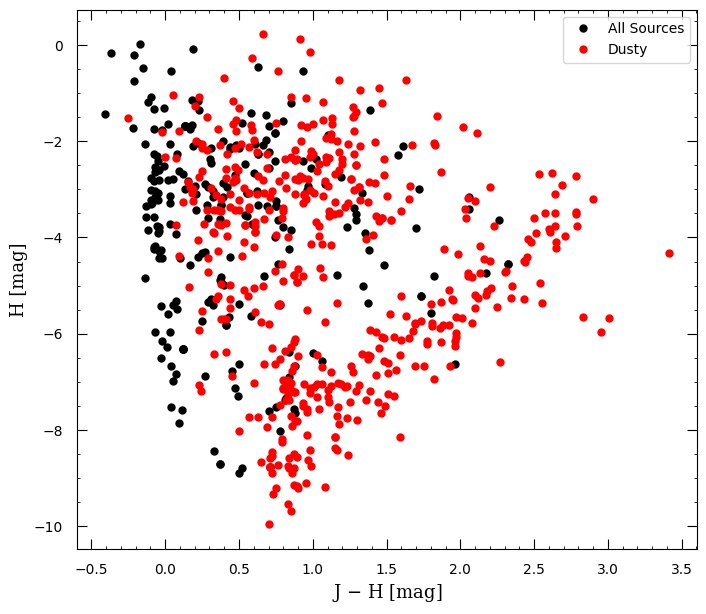

In [ ]:
plt.figure(figsize = (8,7), dpi = 100)

#plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

# xmax , xmin = 5.5 , -0.5
# ymax , ymin = 19  , 10 

# plt.xticks(np.arange(xmin , xmax , step=1))
# plt.yticks(np.arange(ymin , ymax , step=1))
# plt.xlim(xmin, xmax )
# plt.ylim(ymax, ymin )

#Selected Stars 'LPV'
plt.xlabel('J $-$ H [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('H [mag]'          , fontsize = 13, fontname = "serif")

#All 
df1 = df[df['GeneralClass'] == 'Other']
df2 = df[df['GeneralClass'] == 'DSS']
plt.plot(df1['Jmag'] - df1['Hmag'], df1['Hmag'] ,'k.', markersize = '10', label = 'All Sources')
plt.plot(df2['Jmag'] - df2['Hmag'], df2['Hmag'] ,'r.', markersize = '10', label = 'Dusty')

plt.legend(loc='upper right')
plt.savefig('CMD_All_nan.png', bbox_inches='tight', dpi = 400)

In [ ]:
from sklearn import preprocessing

LE = preprocessing.LabelEncoder()
Y = LE.fit_transform(df['SpClass'])
Y = pd.DataFrame(Y)
Y.columns = ['EY']

print('Ordinal Encoding:')
LE.inverse_transform(np.arange(0,5))

Ordinal Encoding:


array(['BSG', 'B[e]', 'C-PN', 'CAGB', 'CPN'], dtype=object)

In [ ]:
X = df[df.columns[2:-2]]
Y = Y['EY']

Here we use an algorithm named IterativeImputer to fill the blank (NaN) data points.

A strategy for imputing missing values by modeling each feature with missing values as a function of other features in a round-robin fashion.

A more sophisticated approach is to use the IterativeImputer class, which models each feature with missing values as a function of other features, and uses that estimate for imputation. It does so in an iterated round-robin fashion: at each step, a feature column is designated as output y and the other feature columns are treated as inputs X. A regressor is fit on (X, y) for known y. Then, the regressor is used to predict the missing values of y. This is done for each feature in an iterative fashion, and then is repeated for max_iter imputation rounds. The results of the final imputation round are returned.

For more information : https://scikit-learn.org/stable/modules/impute.html#iterative-imputer

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer( random_state = 0 )
df[df.columns[2:-2]] = imp.fit_transform(df[df.columns[2:-2]])

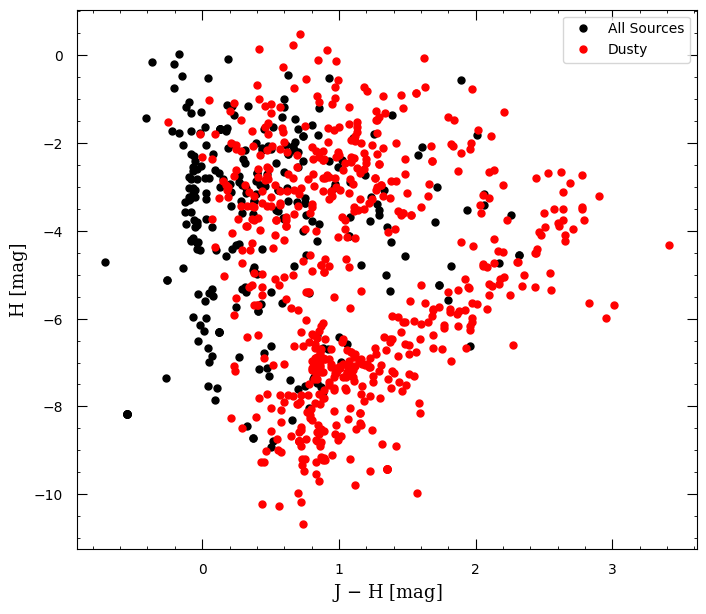

In [ ]:
plt.figure(figsize = (8,7), dpi = 100)

#plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

# xmax , xmin = 5.5 , -0.5
# ymax , ymin = 19  , 10 

# plt.xticks(np.arange(xmin , xmax , step=1))
# plt.yticks(np.arange(ymin , ymax , step=1))
# plt.xlim(xmin, xmax )
# plt.ylim(ymax, ymin )

#Selected Stars 'LPV'
plt.xlabel('J $-$ H [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('H [mag]'          , fontsize = 13, fontname = "serif")

#All 
df1 = df[df['GeneralClass'] == 'Other']
df2 = df[df['GeneralClass'] == 'DSS']
plt.plot(df1['Jmag'] - df1['Hmag'], df1['Hmag'] ,'k.', markersize = '10', label = 'All Sources')
plt.plot(df2['Jmag'] - df2['Hmag'], df2['Hmag'] ,'r.', markersize = '10', label = 'Dusty')

plt.legend(loc='upper right')
plt.savefig('CMD_All.png', bbox_inches='tight', dpi = 400)

# Dust Stellar Sources

## CMD: J_K

In [ ]:
df = pd.read_csv("/content/Dusty-Stellar-Sources-Classification/Data/Preprocessed_Data.csv")

In [ ]:
df.isnull().sum()

RAdeg             0
DEdeg             0
Umag            296
Bmag            201
Vmag            201
Imag            271
Jmag             97
Hmag            105
Ksmag           159
[3.6]            54
[4.5]            22
[5.8]            16
[8.0]            37
[24]             27
SpClass           0
GeneralClass      0
dtype: int64

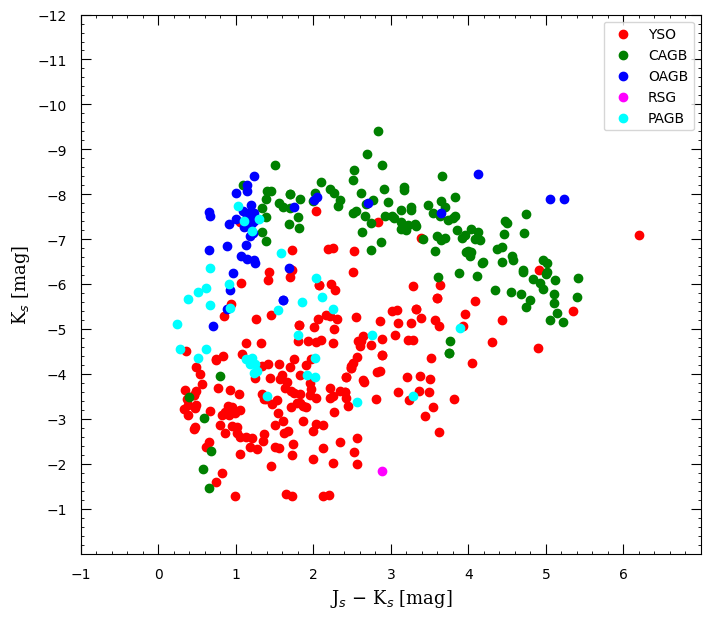

In [ ]:
plt.figure(figsize = (8,7), dpi = 100)

#plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 7 , -1
ymax , ymin = 0  , -12 

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

colors = ['red','green','blue','magenta','cyan']
SpClass = ['YSO','CAGB','OAGB','RSG','PAGB']

#DSS
for i in range(len(SpClass)):
  df_ = df[df['SpClass'] == SpClass[i]]
  color_ = colors[i] 
  plt.scatter(df_['Jmag'] - df_['Ksmag'], df_['Ksmag'] , c=colors[i] ,label = SpClass[i] )

plt.legend(loc='upper right')
plt.savefig('CMD_J_nan.png', bbox_inches='tight', dpi = 400)

In [ ]:
from sklearn import preprocessing

LE = preprocessing.LabelEncoder()
Y = LE.fit_transform(df['SpClass'])
Y = pd.DataFrame(Y)
Y.columns = ['EY']

print('Ordinal Encoding:')
LE.inverse_transform(np.arange(0,5))

Ordinal Encoding:


array(['CAGB', 'OAGB', 'PAGB', 'RSG', 'YSO'], dtype=object)

In [ ]:
X = df[df.columns[2:-2]]
Y = Y['EY']

Here we use an algorithm named IterativeImputer to fill the blank (NaN) data points.

A strategy for imputing missing values by modeling each feature with missing values as a function of other features in a round-robin fashion.

A more sophisticated approach is to use the IterativeImputer class, which models each feature with missing values as a function of other features, and uses that estimate for imputation. It does so in an iterated round-robin fashion: at each step, a feature column is designated as output y and the other feature columns are treated as inputs X. A regressor is fit on (X, y) for known y. Then, the regressor is used to predict the missing values of y. This is done for each feature in an iterative fashion, and then is repeated for max_iter imputation rounds. The results of the final imputation round are returned.

For more information : https://scikit-learn.org/stable/modules/impute.html#iterative-imputer

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer( random_state = 0 )
df[df.columns[2:-2]] = imp.fit_transform(df[df.columns[2:-2]])

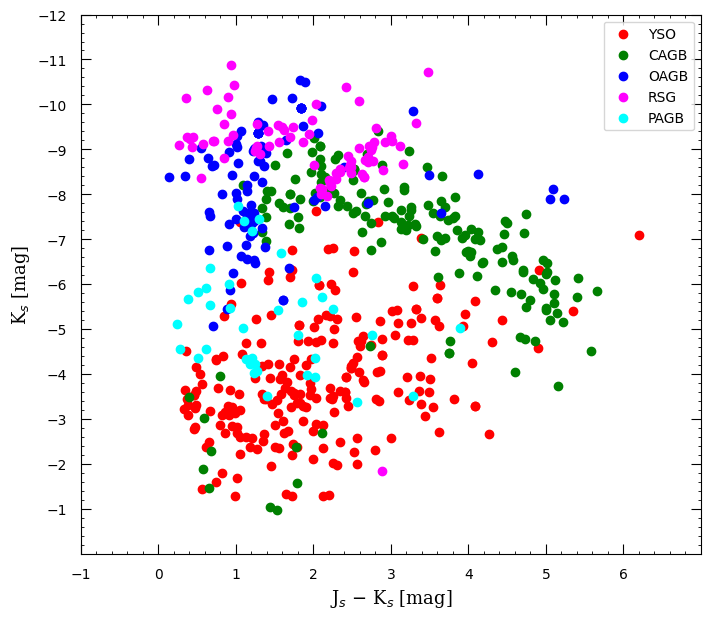

In [ ]:
plt.figure(figsize = (8,7), dpi = 100)

#plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 7 , -1
ymax , ymin = 0  , -12 

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

colors = ['red','green','blue','magenta','cyan']
SpClass = ['YSO','CAGB','OAGB','RSG','PAGB']

#DSS
for i in range(len(SpClass)):
  df_ = df[df['SpClass'] == SpClass[i]]
  color_ = colors[i] 
  plt.scatter(df_['Jmag'] - df_['Ksmag'], df_['Ksmag'] , c=colors[i] ,label = SpClass[i] )

plt.legend(loc='upper right')
plt.savefig('CMD-J.png', bbox_inches='tight', dpi = 400)

## CMD: 3.6 _ 4.5

In [ ]:
df = pd.read_csv("/content/Dusty-Stellar-Sources-Classification/Data/Preprocessed_Data.csv")

In [ ]:
df.isnull().sum()

RAdeg             0
DEdeg             0
Umag            296
Bmag            201
Vmag            201
Imag            271
Jmag             97
Hmag            105
Ksmag           159
[3.6]            54
[4.5]            22
[5.8]            16
[8.0]            37
[24]             27
SpClass           0
GeneralClass      0
dtype: int64

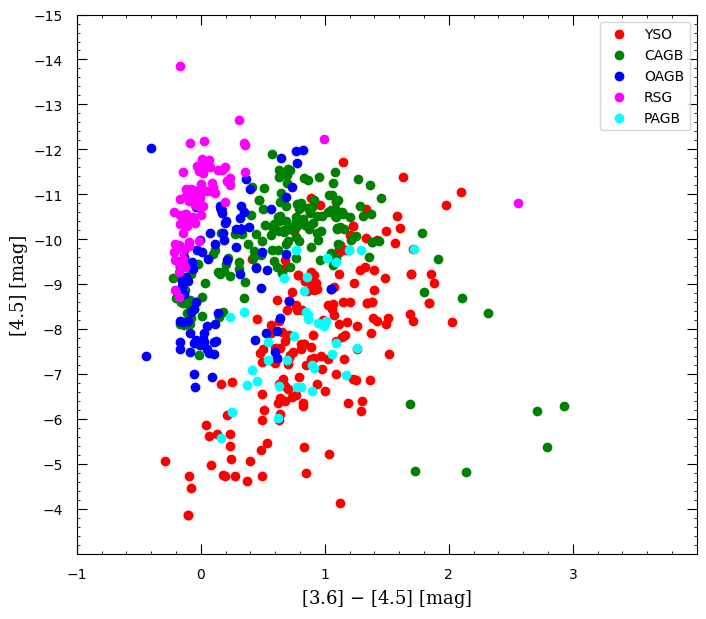

In [ ]:
plt.figure(figsize = (8,7), dpi = 100)

#plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 4 , -1
ymax , ymin = -3  , -15 

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

plt.xlabel('[3.6] $-$ [4.5] [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('[4.5] [mag]'          , fontsize = 13, fontname = "serif")

colors = ['red','green','blue','magenta','cyan']
SpClass = ['YSO','CAGB','OAGB','RSG','PAGB']

#DSS
for i in range(len(SpClass)):
  df_ = df[df['SpClass'] == SpClass[i]]
  color_ = colors[i] 
  plt.scatter(df_['[3.6]'] - df_['[4.5]'], df_['[4.5]'] , c=colors[i] ,label = SpClass[i] )

plt.legend(loc='upper right')
plt.savefig('CMD_35_nan.png', bbox_inches='tight', dpi = 400)

In [ ]:
from sklearn import preprocessing

LE = preprocessing.LabelEncoder()
Y = LE.fit_transform(df['SpClass'])
Y = pd.DataFrame(Y)
Y.columns = ['EY']

print('Ordinal Encoding:')
LE.inverse_transform(np.arange(0,5))

Ordinal Encoding:


array(['CAGB', 'OAGB', 'PAGB', 'RSG', 'YSO'], dtype=object)

In [ ]:
X = df[df.columns[2:-2]]
Y = Y['EY']

Here we use an algorithm named IterativeImputer to fill the blank (NaN) data points.

A strategy for imputing missing values by modeling each feature with missing values as a function of other features in a round-robin fashion.

A more sophisticated approach is to use the IterativeImputer class, which models each feature with missing values as a function of other features, and uses that estimate for imputation. It does so in an iterated round-robin fashion: at each step, a feature column is designated as output y and the other feature columns are treated as inputs X. A regressor is fit on (X, y) for known y. Then, the regressor is used to predict the missing values of y. This is done for each feature in an iterative fashion, and then is repeated for max_iter imputation rounds. The results of the final imputation round are returned.

For more information : https://scikit-learn.org/stable/modules/impute.html#iterative-imputer

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer( random_state = 0 )
df[df.columns[2:-2]] = imp.fit_transform(df[df.columns[2:-2]])

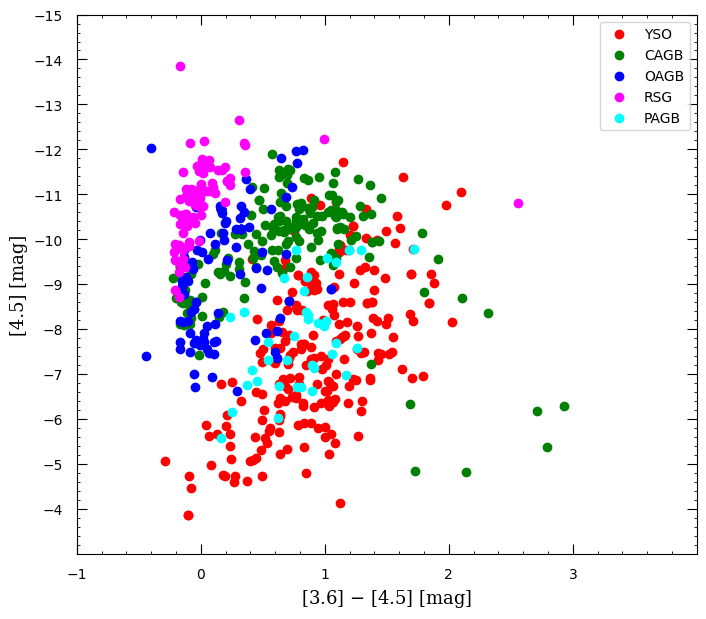

In [ ]:
plt.figure(figsize = (8,7), dpi = 100)

#plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 4 , -1
ymax , ymin = -3  , -15 

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

plt.xlabel('[3.6] $-$ [4.5] [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('[4.5] [mag]'          , fontsize = 13, fontname = "serif")

colors = ['red','green','blue','magenta','cyan']
SpClass = ['YSO','CAGB','OAGB','RSG','PAGB']

#DSS
for i in range(len(SpClass)):
  df_ = df[df['SpClass'] == SpClass[i]]
  color_ = colors[i] 
  plt.scatter(df_['[3.6]'] - df_['[4.5]'], df_['[4.5]'] , c=colors[i] ,label = SpClass[i] )

plt.legend(loc='upper right')
plt.savefig('CMD_35.png', bbox_inches='tight', dpi = 400)

## CMD with Smote

In [30]:
AX_train = pd.read_csv("/content/Dusty-Stellar-Sources-Classification/Data/Smote_train_data.csv", index_col = 'Unnamed: 0' )

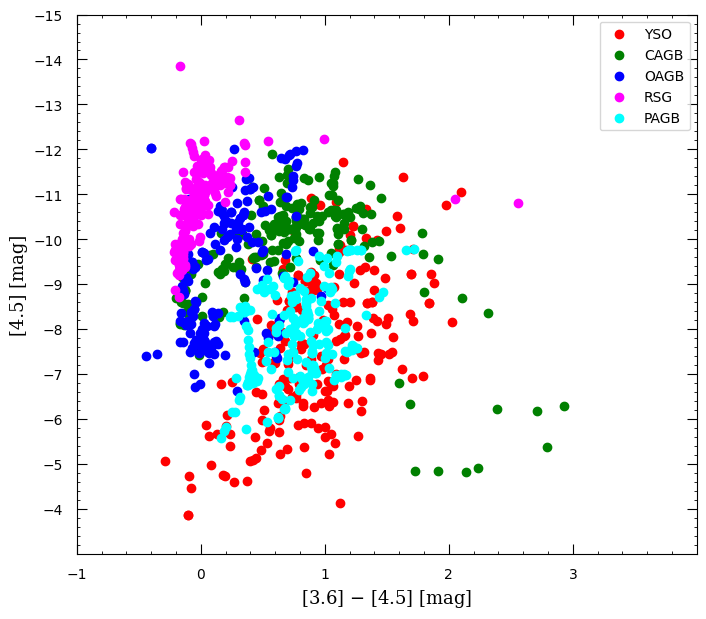

In [32]:
plt.figure(figsize = (8,7), dpi = 100)

#plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 4 , -1
ymax , ymin = -3  , -15 

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

plt.xlabel('[3.6] $-$ [4.5] [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('[4.5] [mag]'          , fontsize = 13, fontname = "serif")

colors = ['red','green','blue','magenta','cyan']
SpClass = ['YSO','CAGB','OAGB','RSG','PAGB']

#DSS
for i in range(len(SpClass)):
  df_ = AX_train[AX_train['SpClass'] == SpClass[i]]
  color_ = colors[i] 
  plt.scatter(df_['[3.6]'] - df_['[4.5]'], df_['[4.5]'] , c=colors[i] ,label = SpClass[i] )

plt.legend(loc='upper right')
plt.savefig('CMD_35_Smote.png', bbox_inches='tight', dpi = 400)

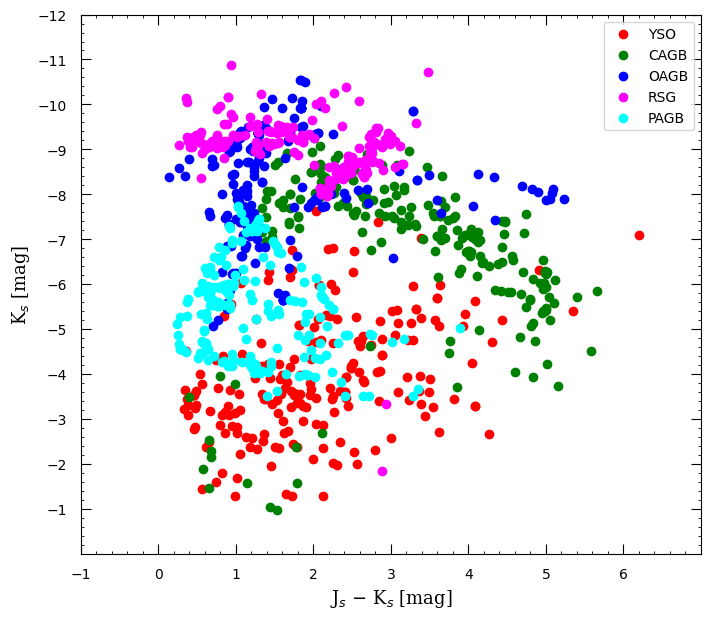

In [33]:
plt.figure(figsize = (8,7), dpi = 100)

#plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 7 , -1
ymax , ymin = 0  , -12 

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

colors = ['red','green','blue','magenta','cyan']
SpClass = ['YSO','CAGB','OAGB','RSG','PAGB']

#DSS
for i in range(len(SpClass)):
  df_ = AX_train[AX_train['SpClass'] == SpClass[i]]
  color_ = colors[i] 
  plt.scatter(df_['Jmag'] - df_['Ksmag'], df_['Ksmag'] , c=colors[i] ,label = SpClass[i] )

plt.legend(loc='upper right')
plt.savefig('CMD_J_Smote.png', bbox_inches='tight', dpi = 400)

## Sample Sources

In [ ]:
df = pd.read_csv("/content/Dusty-Stellar-Sources-Classification/Data/Preprocessed_Data.csv")

In [ ]:
df1 = df[1:4]
df1

,RAdeg,DEdeg,Umag,Bmag,Vmag,Imag,Jmag,Hmag,Ksmag,[3.6],[4.5],[5.8],[8.0],[24],SpClass,GeneralClass
1,71.6131,-68.7963,1.632,2.226,0.531,-2.137,-5.04,-6.57,-7.84,-8.6656,-9.3873,-9.8100,-10.2429,-11.1944,CAGB,DSS
2,71.8277,-69.7057,-0.727,-2.876,-4.804,-7.220,-8.42,NaN,NaN,-9.6540,-9.4759,-9.6545,-9.7627,-10.9685,RSG,DSS
3,72.1573,-69.3936,NaN,3.450,2.467,1.136,-1.32,-3.37,-5.31,-8.1534,-9.0379,-9.8431,-10.6543,-13.6554,YSO,DSS


In [ ]:
df2 = df[607:]
df2

,RAdeg,DEdeg,Umag,Bmag,Vmag,Imag,Jmag,Hmag,Ksmag,[3.6],[4.5],[5.8],[8.0],[24],SpClass,GeneralClass
607,16.039817,-72.837738,-2.197,-3.746,-5.564,NaN,NaN,NaN,NaN,-9.699,-9.711,-9.922,-10.05,-10.804,OAGB,DSS


In [ ]:
df3 = df[575:576]
df3

,RAdeg,DEdeg,Umag,Bmag,Vmag,Imag,Jmag,Hmag,Ksmag,[3.6],[4.5],[5.8],[8.0],[24],SpClass,GeneralClass
575,11.171672,-73.360137,0.288,-1.436,-3.0,-4.503,-5.29,-5.68,-5.82,-6.667,-7.076,-8.567,-10.653,-13.811,PAGB,DSS


In [ ]:
frames = [df1, df2, df3]
result = pd.concat(frames)

In [ ]:
result= result.round(2)

In [ ]:
result = result.reset_index()

In [ ]:
result

,index,RAdeg,DEdeg,Umag,Bmag,Vmag,Imag,Jmag,Hmag,Ksmag,[3.6],[4.5],[5.8],[8.0],[24],SpClass,GeneralClass
0,1,71.61,-68.80,1.63,2.23,0.53,-2.14,-5.04,-6.57,-7.84,-8.67,-9.39,-9.81,-10.24,-11.19,CAGB,DSS
1,2,71.83,-69.71,-0.73,-2.88,-4.80,-7.22,-8.42,NaN,NaN,-9.65,-9.48,-9.65,-9.76,-10.97,RSG,DSS
2,3,72.16,-69.39,NaN,3.45,2.47,1.14,-1.32,-3.37,-5.31,-8.15,-9.04,-9.84,-10.65,-13.66,YSO,DSS
3,607,16.04,-72.84,-2.20,-3.75,-5.56,NaN,NaN,NaN,NaN,-9.70,-9.71,-9.92,-10.05,-10.80,OAGB,DSS
4,575,11.17,-73.36,0.29,-1.44,-3.00,-4.50,-5.29,-5.68,-5.82,-6.67,-7.08,-8.57,-10.65,-13.81,PAGB,DSS


In [ ]:
result.to_csv('Samples.csv')